분류

In [5]:
length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

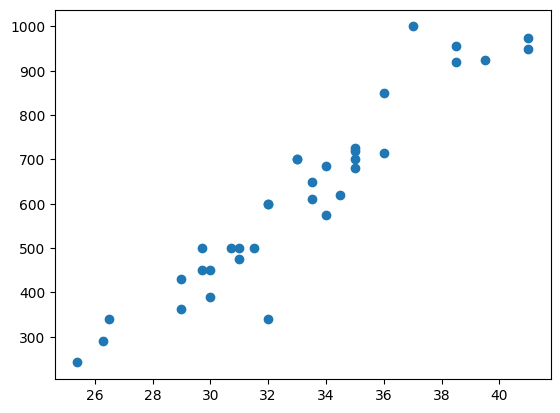

In [6]:
import matplotlib.pyplot as plt
plt.scatter(length,weight)
plt.show()

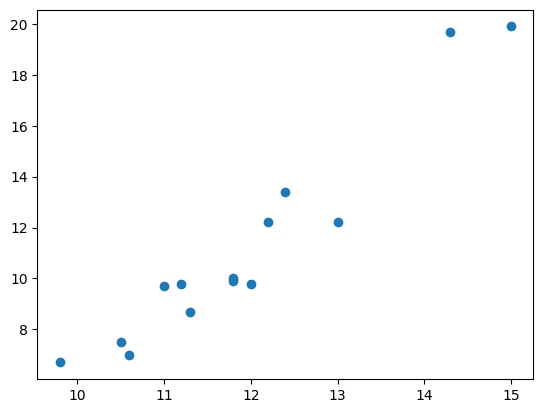

In [7]:
small_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
small_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
plt.scatter(small_length,small_weight)
plt.show()

두개의 그래프를 합친다

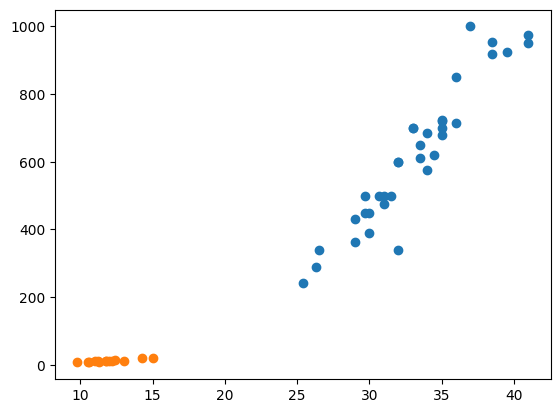

In [8]:
plt.scatter(length,weight)
plt.scatter(small_length,small_weight)
plt.show()

성질이 다른 두개의 데이터를 합친다.

In [9]:
m_length = length + small_length
m_weight = weight + small_weight

In [12]:
data = list(zip(m_length,m_weight))
target = [1]*len(length) + [0]*len(small_length)
data[:5], target[:5], data[-5:], target[-5:]

([(25.4, 242.0), (26.3, 290.0), (26.5, 340.0), (29.0, 363.0), (29.0, 430.0)],
 [1, 1, 1, 1, 1],
 [(12.2, 12.2), (12.4, 13.4), (13.0, 12.2), (14.3, 19.7), (15.0, 19.9)],
 [0, 0, 0, 0, 0])

In [15]:
import pandas as pd
df = pd.DataFrame(data,columns=['length','weight'])
df['target'] = target
df.head()

,length,weight,target
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


In [16]:
# K 최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsClassifier

머신러닝
  - 적합한 머신러닝 모델 선택
  - 해당 모델의 객체 생성
  - fit 메소드를 통해  학습 ( y= ax+b)  학습데이터와 정답
  - score 메소드를 통해 성능 평가
  - predict 메소드를 통해 타겟을 추론한다.

In [17]:
kn = KNeighborsClassifier()
kn.fit(data,target)

KNeighborsClassifier()

In [19]:
# 분류문제는 얼마나 잘 맞췄는지 평가..
kn.score(data,target)

1.0

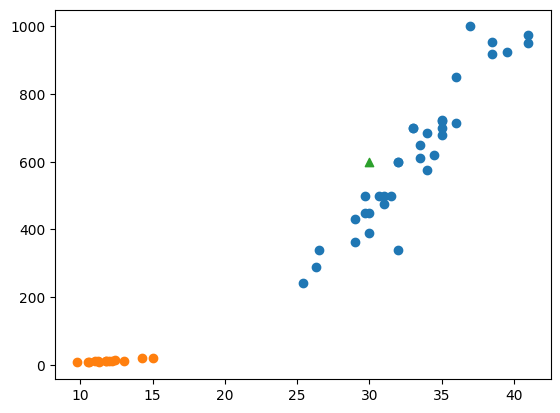

In [20]:
plt.scatter(length,weight)
plt.scatter(small_length,small_weight)
plt.scatter(30,600,marker='^')
plt.show()

In [24]:
kn.predict( [(30,600)] )

array([1])

In [25]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [29]:
len(data)

49

In [37]:
# 전체데이터를 다 사용해서 가장 많은 데이터를 가지고 있는 분류만 학습
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(data,target)
kn49.score(data,target)

0.7142857142857143

In [34]:
35 / 49  # len(length) / len(data)

0.7142857142857143

In [38]:
kn49.predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [39]:
# 과적합
# overfit(과대적합)
# underfit(과소적합)

머신러닝의 파라메터에 따라서 성능이 달라진다.
  - 적합한 파라메터를 셋팅
  - 하이퍼 파라메터 튜닝  

하이퍼 파라메터 튜닝

In [40]:
score_list=[]
for n in range(2,50):
  kn = KNeighborsClassifier(n_neighbors=n)
  kn.fit(data,target)
  score_list.append(kn.score(data,target))

In [42]:
print(score_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9591836734693877, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


In [51]:
import numpy as np
np.where(np.array(score_list) >= 1.0)[0]+2

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

훈련 데이터 + 테스트 데이터

In [52]:
# 7 : 3 으로 나눔

In [55]:
split_num = int(len(data)*0.7)
split_num

34

In [57]:
train_data = np.array(data[ : split_num])
test_data = np.array(data[split_num : ])

train_target = np.array(target[ : split_num])
test_target = np.array(target[split_num : ])

In [59]:
train_data.shape, test_data.shape,  train_target.shape, test_target.shape

((34, 2), (15, 2), (34,), (15,))

In [60]:
# 모델 생성
kn = KNeighborsClassifier()
kn.fit(train_data,train_target)
kn.score(test_data,test_target)

0.06666666666666667

In [61]:
kn.score(train_data,train_target)

1.0

In [63]:
len(train_data)  , len(length)

(34, 35)

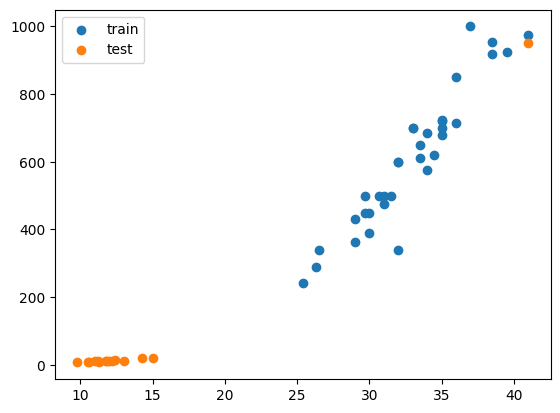

In [65]:
plt.scatter(train_data[:,0],train_data[:,1],label='train')
plt.scatter(test_data[:,0],test_data[:,1],label='test')
plt.legend()
plt.show()

1. 데이터 확보
2. 테이터 분할(학습용,테스트용) - 잘 섞는다
3. 학습용으로 학습
4. 테스트용으로 평가, 예측

In [ ]:
# 1. 테이터 확보
data,target

In [69]:
# 2. 테이터 분할(학습용,테스트용) - 잘 섞는다
from sklearn.utils import shuffle
df_shuffle = shuffle(df)
df_shuffle.head()

,length,weight,target
41,11.8,10.0,0
1,26.3,290.0,1
10,31.0,475.0,1
44,12.2,12.2,0
42,11.8,9.9,0


In [71]:
Y = df_shuffle.iloc[:, -1]
X = df_shuffle.iloc[:, : -1 ]
X.shape, Y.shape

((49, 2), (49,))

In [75]:
train_data = X.iloc[ : split_num]
test_data = X.iloc[split_num : ]

train_target = Y.iloc[ : split_num]
test_target = Y.iloc[ split_num : ]

In [76]:
train_data.shape, test_data.shape, train_target.shape, test_target.shape

((34, 2), (15, 2), (34,), (15,))

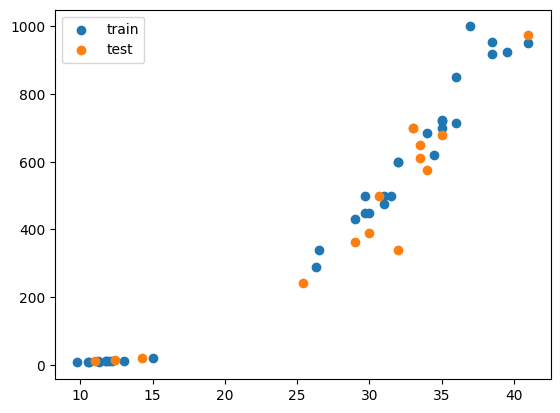

In [78]:
plt.scatter(train_data.iloc[:,0],train_data.iloc[:,1],label='train')
plt.scatter(test_data.iloc[:,0],test_data.iloc[:,1],label='test')
plt.legend()
plt.show()

In [79]:
# 모델선정
kn = KNeighborsClassifier()
# 학습
kn.fit(train_data,train_target)
# 검증(테스트용 데이터)
kn.score(test_data,test_target)

1.0

In [80]:
kn.predict(test_data)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [83]:
print(test_target.values)

[1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
